In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import norm
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
## Sætter grænseværdien for animationsstørrelsen op##
matplotlib.rcParams['animation.embed_limit'] = 2**128

## Normalt pendul uden småvinkel app.

Lagrange er:
\begin{equation}
\mathcal{L}(\phi,\dot{\phi})=\frac{m}{2}L^2\dot{\phi}^2-mgL(1-cos(\phi))
\end{equation}
og bevægelseslign. bliver:
\begin{equation}
\ddot{\phi}=-\frac{g}{l}sin(\phi)
\end{equation}

Text(0.5, 0, '$t$')

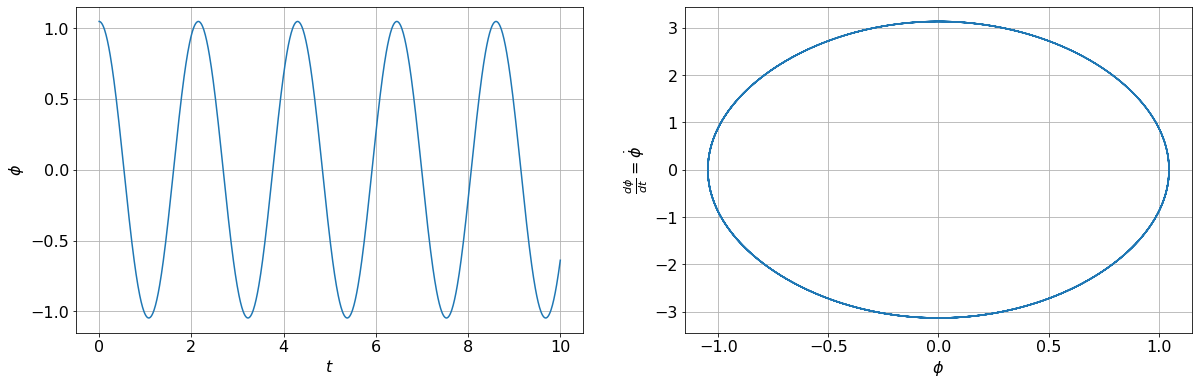

In [3]:
m=2
l = 1
g = 9.82 


tinit = 0
tfinal = 10
trange = [tinit,tfinal]

##startbetingelser##
phi_0 = np.pi/3
phi_prik_0 = 0

yinit = [phi_0,phi_prik_0]
ts = np.linspace(tinit, tfinal, 1000)

def dydt(t,y):
    phi = y[0]
    phi_prik = y[1]
    d_phi_dt = phi_prik
    d_phi_prik_dt = -g/l*np.sin(phi)
    return [d_phi_dt,d_phi_prik_dt]

mysol = solve_ivp(dydt, trange, yinit, t_eval = ts,rtol=10e-13)
ts = mysol.t
phi = mysol.y[0]
phi_prik = mysol.y[1]

plt.rc('font', size=16)
fig,ax = plt.subplots(1,2,figsize=(20,6))
ax[1].plot(phi,phi_prik)
ax[1].grid()
ax[1].set_xlabel('$\phi$')
ax[1].set_ylabel(r'$\frac{d\phi}{dt}=\dot{\phi}$')

ax[0].plot(ts,phi)
ax[0].grid()
ax[0].set_ylabel('$\phi$')
ax[0].set_xlabel(r'$t$')

# Tjekker energibevarelse

In [5]:
def energy(angle,angle_dt,mass,length,grav_const):
    T=mass/2*angle_dt**2*length**2
    U=mass*length*grav_const*(1-np.cos(angle))
    return T, U , T+U

T=energy(phi,phi_prik,m,l,g)[0]
U=energy(phi,phi_prik,m,l,g)[1]
E_tot=energy(phi,phi_prik,m,l,g)[2]

(<matplotlib.collections.LineCollection at 0x237df99f148>,
 None,
 (0.0, 10.0))

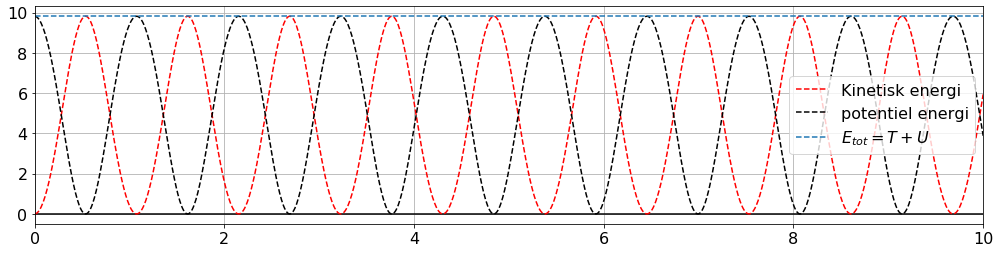

In [6]:
fig, ax = plt.subplots(figsize=(17,4))
ax.plot(ts,T,color='red',label='Kinetisk energi',linestyle='--')
ax.plot(ts,U,color='black',label='potentiel energi',linestyle='--')
ax.plot(ts,E_tot,label=r'$E_{tot}=T+U$',linestyle='--')
ax.hlines(0,ts[0],ts[-1]),ax.grid(), ax.legend(), ax.set_xlim(ts[0],ts[-1])


# Animerer

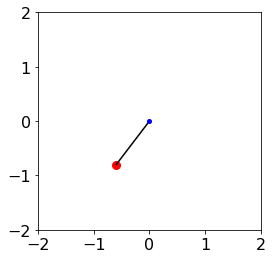

In [7]:
def angle_to_cartesian(angle):
    x = np.sin(angle)*l
    y = -np.cos(angle)*l
    return [x,y]

xs = angle_to_cartesian(phi)[0].tolist()
ys = angle_to_cartesian(phi)[1].tolist()

fig, ax = plt.subplots(figsize=(4, 4))
dot, = ax.plot([],[],'ro',ms=8)
line, = ax.plot([],[],color='black')


def update(i):
    dot.set_data(xs[i],ys[i])
    line.set_data([0,xs[i]],[0,ys[i]])
    return line, dot,

ax.plot(0,0,'bo', ms = 4)

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
anim = animation.FuncAnimation(fig,
                               update,
                               frames=len(ts),
                               interval=10,
                               blit=True,
                               repeat_delay=0)
anim